<a href="https://colab.research.google.com/github/vaishnavipatil29/GRIP-Data-Science-Internship-Sparks-Foundation/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task-1 : Predict the percentage of an student based on the no. of study hours. : Linear Regression

In [60]:
# Import the librarries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

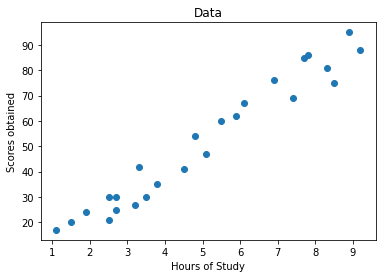

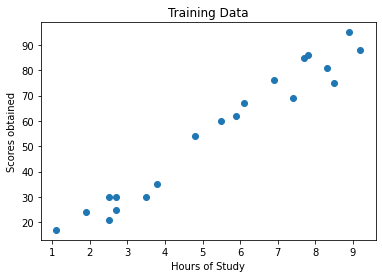

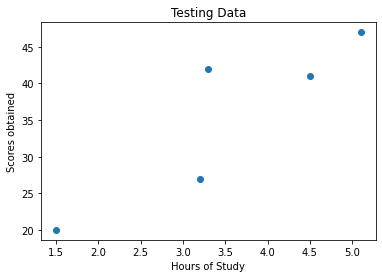

In [104]:
#import and study data
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)
# Dependent and Independent Variables
X = df['Hours']
y = df['Scores']
plt.scatter(X,Y)
plt.title('Data')
plt.xlabel('Hours of Study')
plt.ylabel('Scores obtained')
plt.show()
# Train and test Spliting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
plt.scatter(X_train,y_train)
plt.title('Training Data')
plt.xlabel('Hours of Study')
plt.ylabel('Scores obtained')
plt.show()
plt.scatter(X_test,y_test)
plt.title('Testing Data')
plt.xlabel('Hours of Study')
plt.ylabel('Scores obtained')
plt.show()

Method -1 : Matrix Inversion or Normal Equations method

In [105]:
# Form the features Matrix : X and append 1's row to it
X=np.array([X_train]).T
ones=(np.ones((len(X),), dtype=int))
ones=np.array([ones]).T
# Final feature Matrix : m x (n+1) : len(X_train) x 2 (m: no. of data points, n:number of features)
X = np.append(ones, X, axis=1)

# Form the output y matrix
y = np.array([y_train]).T  # m X 1 matrix

Predicted values : y=w0+w1*x
Parameters are: 
w0 =  [2.64996519]
w1 =  [9.81430544]


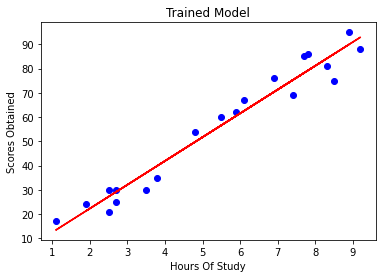

In [106]:
# Finding the parameters
param = (np.linalg.inv(X.T @ X))@ X.T @ y 
print("Predicted values : y=w0+w1*x")
print("Parameters are: ")
print("w0 = ",param[0])
print("w1 = ",param[1])

# Fitting the line
y_pred = param[0] + param[1]*X_train

# Plotting 
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,y_pred,color='red')
plt.title('Trained Model')
plt.xlabel('Hours Of Study')
plt.ylabel('Scores Obtained')
plt.show()

In [107]:
# Testing Model
y_pred = param[0] + param[1]*X_test
pred = pd.DataFrame({'Actual Values': y_test, 'Predicted': y_pred})
pred=pred.reset_index(drop=True)
pred

,Actual Values,Predicted
0,20,17.371423
1,47,52.702923
2,42,35.037173
3,27,34.055743
4,41,46.814340


In [108]:
# Evalaution Metrics
from sklearn import metrics
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error :  5.632881746692995


In [110]:
#Prediction For 9.25 hrs/day:
score = param[0] + param[1]*9.25
print("Predicted Score for 9.25 hrs/day from Matrix Inversion Method: ",score)

Predicted Score for 9.25 hrs/day from Matrix Inversion Method:  [93.43229054]


Method 2 : Use gradient descent to find the optimal values: y=w0+w1x

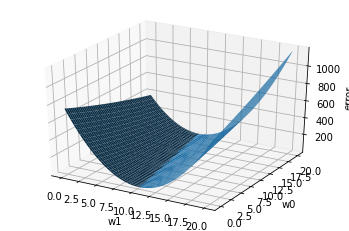

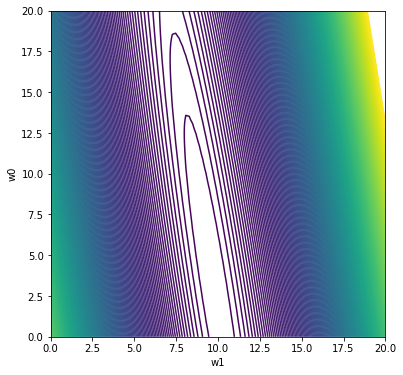

In [111]:
from mpl_toolkits import mplot3d
#Assume some random values
w1 = np.linspace(0,20, 100)
w0 = np.linspace(0,20,100)
error = []
for i in w0 :
    for j in w1 :
        y_pred=j*X_train+i 
        error.append(1/100*np.sum((np.array(y_pred)-np.array(y_train))**2))
    

W1, W0 = np.meshgrid(w1, w0) 
error = np.reshape(np.array(error),(len(w1),len(w0)))
ax = plt.axes(projection='3d')
ax.plot_surface(W1, W0, error)
ax.set_xlabel('w1')
ax.set_ylabel('w0')
ax.set_zlabel('error')
plt.show()
fig, ax = plt.subplots(figsize=(6,6))
ax.contour(W1,W0,error,levels=[i for i in np.arange(0,1000,5)])
ax.set_xlabel('w1')
ax.set_ylabel('w0')
plt.show()

2.664102228215699 9.812154262250077


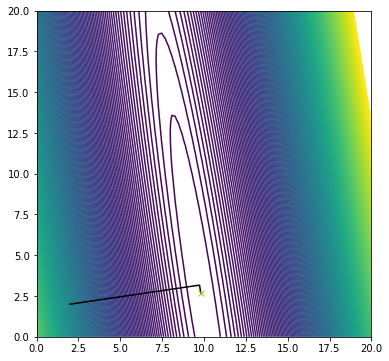

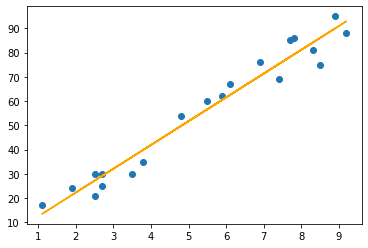

In [112]:
#initialise parametres
w0=[2]
w1=[2]
# decide learning rate
lr=0.01
eps=0.00001

#Gradient Descent
for i in range(1000):
    y_pred = w1[-1]*X_train + w0[-1]
    err_0 = w0[-1] - (lr*-2*np.mean(y_train-y_pred))
    err_1 = w1[-1] - (lr*(np.mean((y_train-y_pred)*X_train)*-2))
    w0.append(err_0)
    w1.append(err_1)
    
    

print(w0[-1],w1[-1])

fig, ax = plt.subplots(figsize=(6,6))
ax.contour(W1,W0,error,levels=[i for i in np.arange(0,1000,5)])
plt.plot(np.asarray(w1),np.asarray(w0),'black')  # w1 vs w1
plt.plot(w1[-1],w0[-1],'yx')  #w1 and w0 at which the the error is minimum
plt.show() 
plt.scatter(X_train,y_train)
plt.plot(X_train,w0[-1] + w1[-1]*X_train,c='orange')


In [113]:
# Testing Model
param[0]=w0[-1]
param[1]=w1[-1]
y_pred = param[0] + param[1]*X_test
pred = pd.DataFrame({'Actual Values': y_test, 'Predicted': y_pred})
pred=pred.reset_index(drop=True)
pred

,Actual Values,Predicted
0,20,17.382334
1,47,52.706089
2,42,35.044211
3,27,34.062996
4,41,46.818796


In [114]:
# Evalaution Metrics
from sklearn import metrics
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error :  5.632267265243263


In [115]:
#Prediction For 9.25 hrs/day:
score = param[0] + param[1]*9.25
print("Predicted Score for 9.25 hrs/day from Gradient Descent: ",score)

Predicted Score for 9.25 hrs/day from Gradient Descent:  [93.42652915]
